In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define paths to your dataset folders
mature_dir = r'C:\Users\chait\Desktop\Dragon Fruit Maturity Detection Dataset\Dragon Fruit Maturity Detection Dataset\Augmented Dataset\Mature Dragon Fruit'
immature_dir = r'C:\Users\chait\Desktop\Dragon Fruit Maturity Detection Dataset\Dragon Fruit Maturity Detection Dataset\Augmented Dataset\Immature Dragon Fruit'

# List all image files in the mature and immature directories
mature_files = [os.path.join(mature_dir, filename) for filename in os.listdir(mature_dir) if filename.endswith('.jpg')]
immature_files = [os.path.join(immature_dir, filename) for filename in os.listdir(immature_dir) if filename.endswith('.jpg')]

# Combine file lists and create labels (0 for mature, 1 for immature)
all_files = mature_files + immature_files
labels = [0] * len(mature_files) + [1] * len(immature_files)

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(all_files, labels, test_size=0.2, random_state=42)

# Further split training set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Load and resize image
    img_array = img_to_array(img) / 255.0                # Convert image to array and normalize
    return img_array

# Load and preprocess images for training set
X_train = np.array([load_and_preprocess_image(img_path) for img_path in X_train])
y_train = np.array(y_train)

# Load and preprocess images for validation set
X_val = np.array([load_and_preprocess_image(img_path) for img_path in X_val])
y_val = np.array(y_val)

# Load and preprocess images for test set
X_test = np.array([load_and_preprocess_image(img_path) for img_path in X_test])
y_test = np.array(y_test)

# Verify shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (3206, 150, 150, 3), y_train shape: (3206,)
X_val shape: (802, 150, 150, 3), y_val shape: (802,)
X_test shape: (1002, 150, 150, 3), y_test shape: (1002,)


In [2]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification (sigmoid activation)
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [3]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32)

# Extract training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Print training and validation metrics for each epoch
for epoch in range(len(training_loss)):
    print(f"Epoch {epoch + 1}/{len(training_loss)} - "
          f"Loss: {training_loss[epoch]:.4f} - "
          f"Accuracy: {training_accuracy[epoch]:.4f} - "
          f"Val Loss: {validation_loss[epoch]:.4f} - "
          f"Val Accuracy: {validation_accuracy[epoch]:.4f}")

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10


101/101 [==============================] - 40s 385ms/step - loss: 0.1303 - accuracy: 0.9588 - val_loss: 0.0169 - val_accuracy: 0.9963
Epoch 2/10
101/101 [==============================] - 43s 430ms/step - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.0141 - val_accuracy: 0.9963
Epoch 3/10
101/101 [==============================] - 40s 394ms/step - loss: 5.2686e-04 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9925
Epoch 4/10
101/101 [==============================] - 40s 395ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0069 - val_accuracy: 0.9963
Epoch 5/10
101/101 [==============================] - 49s 490ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.0095 - val_accuracy: 0.9975
Epoch 6/10
101/101 [==============================] - 47s 461ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0100 - val_accuracy: 0.9988
Epoch 7/10
101/101 [==============================] - 41s 407ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0011 - 

26/26 [==============================] - 2s 70ms/step
Accuracy: 0.9963
Precision: 0.9938
Recall: 1.0000


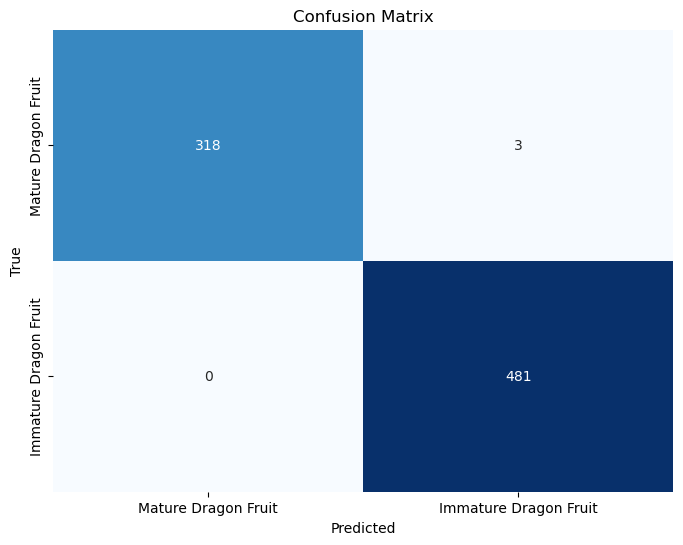

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predictions on validation set
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Generate confusion matrix
conf_mat = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Mature Dragon Fruit', 'Immature Dragon Fruit'],
            yticklabels=['Mature Dragon Fruit', 'Immature Dragon Fruit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
